In [101]:
import pandas as pd
import statsmodels.api as sm
air_passengers_data = sm.datasets.get_rdataset("AirPassengers", "datasets").data
air_passengers_data['year'] = air_passengers_data['time'].apply(lambda x: int(x))
air_passengers_data['month'] = air_passengers_data['time'].apply(lambda x: int(round((x - int(x)) * 12)) + 1)
air_passengers_data['date'] = pd.to_datetime(air_passengers_data['year'].astype(str) + '-' +air_passengers_data['month'].astype(str))
df = air_passengers_data.set_index('date')['value'].to_frame()
df.rename(columns={'value': 'passengers'}, inplace=True)
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataFrame Info:")
df.info()

First 5 rows of the dataset:
            passengers
date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [102]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
passengers    0
dtype: int64


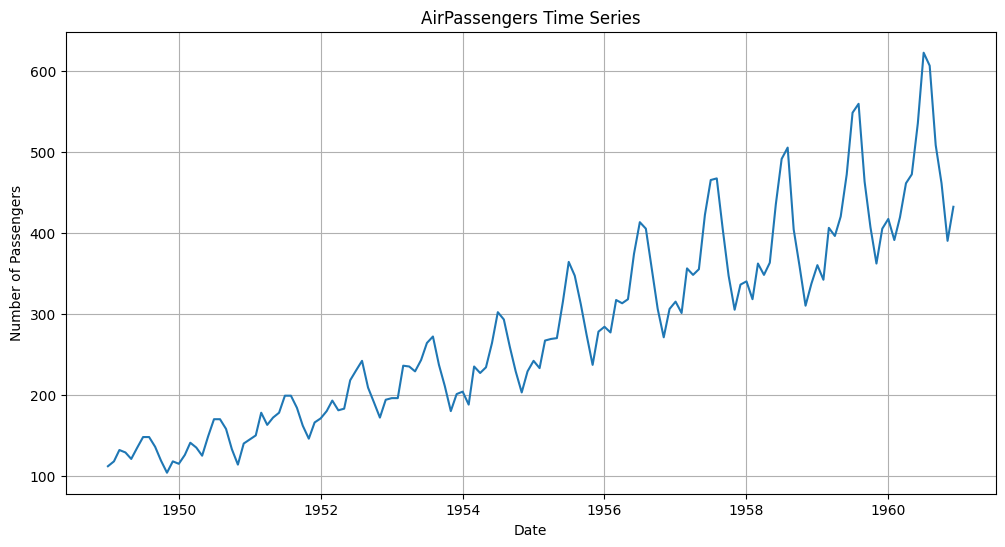

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['passengers'])
plt.title('AirPassengers Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


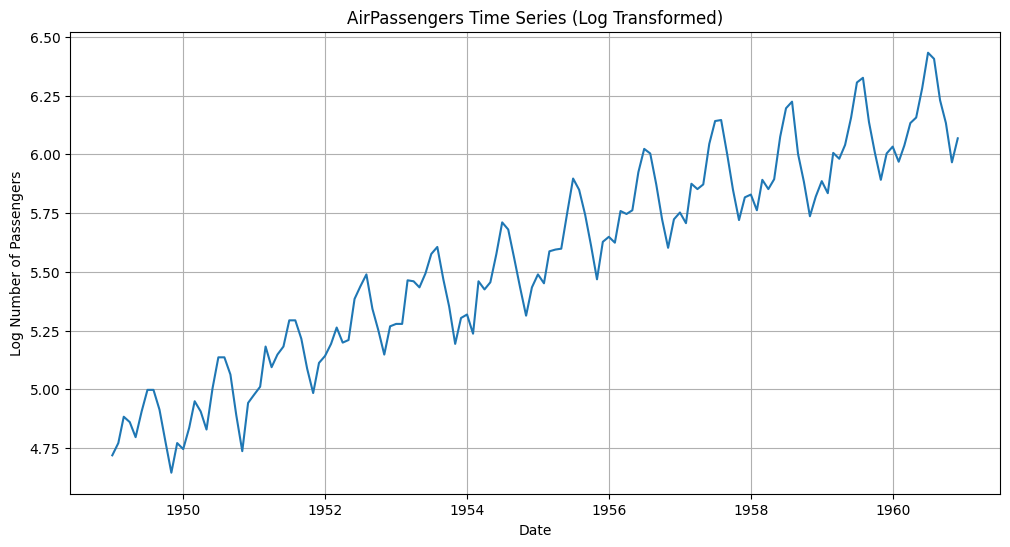

First 5 rows of the log-transformed dataset:
            passengers  passengers_log
date                                  
1949-01-01         112        4.718499
1949-02-01         118        4.770685
1949-03-01         132        4.882802
1949-04-01         129        4.859812
1949-05-01         121        4.795791


In [104]:
import numpy as np
df['passengers_log'] = np.log(df['passengers'])
plt.figure(figsize=(12, 6))
plt.plot(df['passengers_log'])
plt.title('AirPassengers Time Series (Log Transformed)')
plt.xlabel('Date')
plt.ylabel('Log Number of Passengers')
plt.grid(True)
plt.show()
print("First 5 rows of the log-transformed dataset:")
print(df.head())

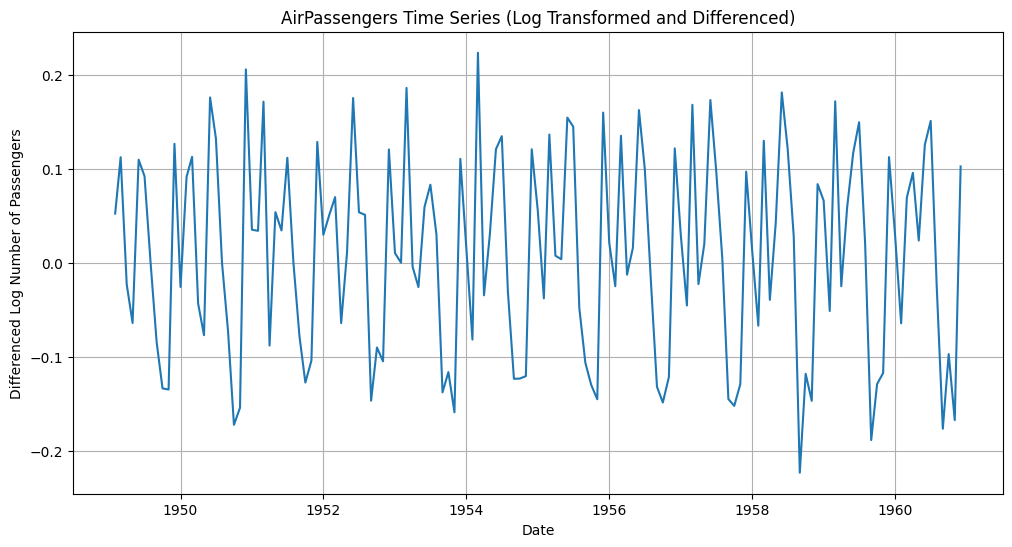

First 5 rows of the differenced dataset (note NaNs due to differencing):
            passengers  passengers_log  passengers_diff
date                                                   
1949-01-01         112        4.718499              NaN
1949-02-01         118        4.770685         0.052186
1949-03-01         132        4.882802         0.112117
1949-04-01         129        4.859812        -0.022990
1949-05-01         121        4.795791        -0.064022


In [105]:
df['passengers_diff'] = df['passengers_log'].diff()
plt.figure(figsize=(12, 6))
plt.plot(df['passengers_diff'])
plt.title('AirPassengers Time Series (Log Transformed and Differenced)')
plt.xlabel('Date')
plt.ylabel('Differenced Log Number of Passengers')
plt.grid(True)
plt.show()
print("First 5 rows of the differenced dataset (note NaNs due to differencing):")
print(df.head())

In [106]:
from statsmodels.tsa.stattools import adfuller
diff_series = df['passengers_diff'].dropna()
result = adfuller(diff_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("\nConclusion: The time series is likely stationary (p-value <= 0.05).")
else:
    print("\nConclusion: The time series is likely non-stationary (p-value > 0.05).")

ADF Statistic: -2.717131
p-value: 0.071121
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579

Conclusion: The time series is likely non-stationary (p-value > 0.05).


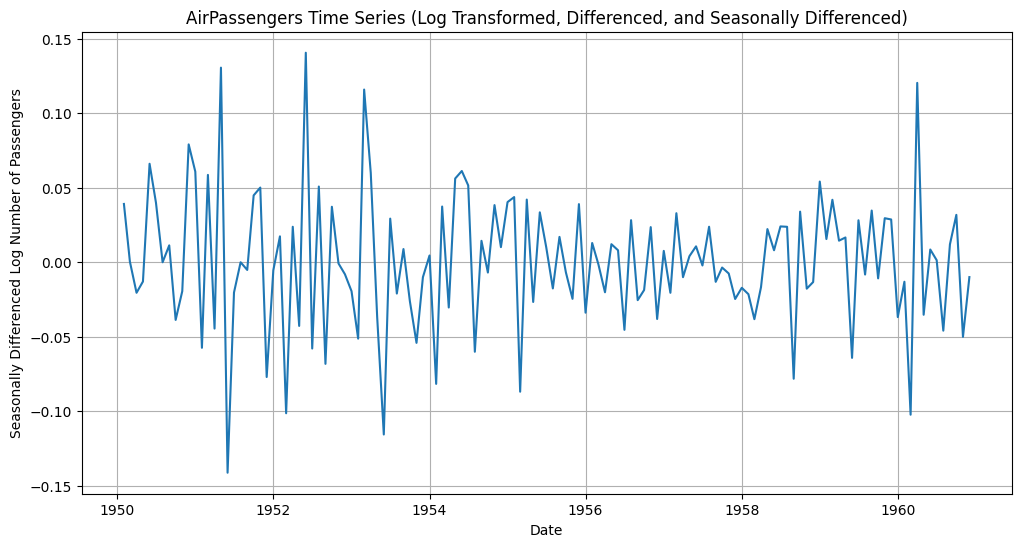

First 15 rows of the seasonally differenced dataset (note NaNs due to differencing):
            passengers  passengers_log  passengers_diff  \
date                                                      
1949-01-01         112        4.718499              NaN   
1949-02-01         118        4.770685         0.052186   
1949-03-01         132        4.882802         0.112117   
1949-04-01         129        4.859812        -0.022990   
1949-05-01         121        4.795791        -0.064022   
1949-06-01         135        4.905275         0.109484   
1949-07-01         148        4.997212         0.091937   
1949-08-01         148        4.997212         0.000000   
1949-09-01         136        4.912655        -0.084557   
1949-10-01         119        4.779123        -0.133531   
1949-11-01         104        4.644391        -0.134733   
1949-12-01         118        4.770685         0.126294   
1950-01-01         115        4.744932        -0.025752   
1950-02-01         126        

In [107]:
df['passengers_diff_seasonal'] = df['passengers_diff'].diff(12)
plt.figure(figsize=(12, 6))
plt.plot(df['passengers_diff_seasonal'])
plt.title('AirPassengers Time Series (Log Transformed, Differenced, and Seasonally Differenced)')
plt.xlabel('Date')
plt.ylabel('Seasonally Differenced Log Number of Passengers')
plt.grid(True)
plt.show()
print("First 15 rows of the seasonally differenced dataset (note NaNs due to differencing):")
print(df.head(15))

In [108]:
from statsmodels.tsa.stattools import adfuller
diff_seasonal_series = df['passengers_diff_seasonal'].dropna()
result_seasonal = adfuller(diff_seasonal_series)
print('ADF Statistic (Seasonally Differenced): %f' % result_seasonal[0])
print('p-value (Seasonally Differenced): %f' % result_seasonal[1])
print('Critical Values:')
for key, value in result_seasonal[4].items():
    print('	%s: %.3f' % (key, value))
if result_seasonal[1] <= 0.05:
    print("\nConclusion: The seasonally differenced time series is likely stationary (p-value <= 0.05).")
else:
    print("\nConclusion: The seasonally differenced time series is likely non-stationary (p-value > 0.05).")

ADF Statistic (Seasonally Differenced): -4.443325
p-value (Seasonally Differenced): 0.000249
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580

Conclusion: The seasonally differenced time series is likely stationary (p-value <= 0.05).


In [109]:
from sklearn.preprocessing import MinMaxScaler
scaled_data = df['passengers_diff_seasonal'].dropna()
scaled_data = scaled_data.values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(scaled_data)
df_scaled_series = pd.Series(df_scaled.flatten(), index=df['passengers_diff_seasonal'].dropna().index, name='passengers_scaled')
df = df.join(df_scaled_series)

In [110]:
print("First 5 rows of the scaled dataset:")
print(df[['passengers_diff_seasonal', 'passengers_scaled']].head())
print("\nMin and Max of scaled data:")
print(f"Min: {df_scaled.min():.4f}, Max: {df_scaled.max():.4f}")

First 5 rows of the scaled dataset:
            passengers_diff_seasonal  passengers_scaled
date                                                   
1949-01-01                       NaN                NaN
1949-02-01                       NaN                NaN
1949-03-01                       NaN                NaN
1949-04-01                       NaN                NaN
1949-05-01                       NaN                NaN

Min and Max of scaled data:
Min: 0.0000, Max: 1.0000


In [111]:
df_features = df[['passengers_scaled']].copy()
for i in range(1, 13): 
    df_features[f'passengers_scaled_lag_{i}'] = df_features['passengers_scaled'].shift(i)
df_features['year'] = df_features.index.year
df_features['month'] = df_features.index.month
df_features.dropna(inplace=True)
print("First 5 rows of the feature-engineered dataset:")
print(df_features.head())
print("\nShape of the feature-engineered dataset:", df_features.shape)

First 5 rows of the feature-engineered dataset:
            passengers_scaled  passengers_scaled_lag_1  \
date                                                     
1951-02-01           0.297434                 0.716815   
1951-03-01           0.709109                 0.297434   
1951-04-01           0.343169                 0.709109   
1951-05-01           0.964495                 0.343169   
1951-06-01           0.000000                 0.964495   

            passengers_scaled_lag_2  passengers_scaled_lag_3  \
date                                                           
1951-02-01                 0.781717                 0.432263   
1951-03-01                 0.716815                 0.781717   
1951-04-01                 0.297434                 0.716815   
1951-05-01                 0.709109                 0.297434   
1951-06-01                 0.343169                 0.709109   

            passengers_scaled_lag_4  passengers_scaled_lag_5  \
date                            

In [112]:
total_samples = len(df_features)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.15)
test_size = total_samples - train_size - val_size
train_data = df_features.iloc[:train_size]
val_data = df_features.iloc[train_size:train_size + val_size]
test_data = df_features.iloc[train_size + val_size:]
print(f"Total samples: {total_samples}")
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")
print("\nFirst 5 rows of Training data:")
print(train_data.head())
print("\nFirst 5 rows of Validation data:")
print(val_data.head())
print("\nFirst 5 rows of Test data:")
print(test_data.head())

Total samples: 119
Training set size: 83
Validation set size: 17
Test set size: 19

First 5 rows of Training data:
            passengers_scaled  passengers_scaled_lag_1  \
date                                                     
1951-02-01           0.297434                 0.716815   
1951-03-01           0.709109                 0.297434   
1951-04-01           0.343169                 0.709109   
1951-05-01           0.964495                 0.343169   
1951-06-01           0.000000                 0.964495   

            passengers_scaled_lag_2  passengers_scaled_lag_3  \
date                                                           
1951-02-01                 0.781717                 0.432263   
1951-03-01                 0.716815                 0.781717   
1951-04-01                 0.297434                 0.716815   
1951-05-01                 0.709109                 0.297434   
1951-06-01                 0.343169                 0.709109   

            passengers_scaled

In [113]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
passengers_log_series = df['passengers_log']
sarima_train_log_val_set = passengers_log_series.loc[:train_data.index[-1]]
sarima_val_log_set = passengers_log_series.loc[val_data.index[0]:val_data.index[-1]]
actual_val_passengers = df['passengers'].loc[val_data.index[0]:val_data.index[-1]]
sarima_train_log_test_set = passengers_log_series.loc[:val_data.index[-1]]
sarima_test_log_set = passengers_log_series.loc[test_data.index[0]:test_data.index[-1]]
actual_test_passengers = df['passengers'].loc[test_data.index[0]:test_data.index[-1]]

In [114]:
print("Data preparation for SARIMA complete.")
print(f"SARIMA train (val) set size: {len(sarima_train_log_val_set)}")
print(f"SARIMA validation set size: {len(sarima_val_log_set)}")
print(f"SARIMA train (test) set size: {len(sarima_train_log_test_set)}")
print(f"SARIMA test set size: {len(sarima_test_log_set)}")

Data preparation for SARIMA complete.
SARIMA train (val) set size: 108
SARIMA validation set size: 17
SARIMA train (test) set size: 125
SARIMA test set size: 19


In [115]:
print("3. Training and forecasting for the validation set...")
sarima_model_val = SARIMAX(sarima_train_log_val_set, order=order, seasonal_order=seasonal_order)
sarima_model_val_fit = sarima_model_val.fit(disp=False)
start_val = sarima_val_log_set.index[0]
end_val = sarima_val_log_set.index[-1]
sarima_val_preds_log = sarima_model_val_fit.get_forecast(steps=len(sarima_val_log_set)).predicted_mean
sarima_val_preds_log.index = sarima_val_log_set.index
sarima_val_preds_original_scale = np.exp(sarima_val_preds_log)
print("SARIMA model for validation trained and predictions generated.")
print(f"Validation predictions (original scale) first 5 rows:\n{sarima_val_preds_original_scale.head()}")

3. Training and forecasting for the validation set...


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA model for validation trained and predictions generated.
Validation predictions (original scale) first 5 rows:
date
1958-01-01    351.275510
1958-02-01    340.746504
1958-03-01    398.634445
1958-04-01    391.762950
1958-05-01    397.321708
Name: predicted_mean, dtype: float64


In [116]:
print("4. Training and forecasting for the test set...")
sarima_model_test = SARIMAX(sarima_train_log_test_set, order=order, seasonal_order=seasonal_order)
sarima_model_test_fit = sarima_model_test.fit(disp=False)
start_test = sarima_test_log_set.index[0]
end_test = sarima_test_log_set.index[-1]
sarima_test_preds_log = sarima_model_test_fit.get_forecast(steps=len(sarima_test_log_set)).predicted_mean
sarima_test_preds_log.index = sarima_test_log_set.index
sarima_test_preds_original_scale = np.exp(sarima_test_preds_log)
print("SARIMA model for test trained and predictions generated.")
print(f"Test predictions (original scale) first 5 rows:\n{sarima_test_preds_original_scale.head()}")

4. Training and forecasting for the test set...


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA model for test trained and predictions generated.
Test predictions (original scale) first 5 rows:
date
1959-06-01    490.235853
1959-07-01    546.553598
1959-08-01    549.814092
1959-09-01    463.200463
1959-10-01    405.301417
Name: predicted_mean, dtype: float64


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5. Calculating performance metrics...

Validation Set Metrics:
Validation Set (h=1)
  RMSE: 11.2755
  MAE: 11.2755
  MAPE: 3.3163%
Validation Set (h=12)
  RMSE: 32.4363
  MAE: 30.0935
  MAPE: 8.2406%

Test Set Metrics:
Test Set (h=1)
  RMSE: 18.2359
  MAE: 18.2359
  MAPE: 3.8635%
Test Set (h=12)
  RMSE: 14.5064
  MAE: 11.3339
  MAPE: 2.5841%

6. Visualizing predictions...


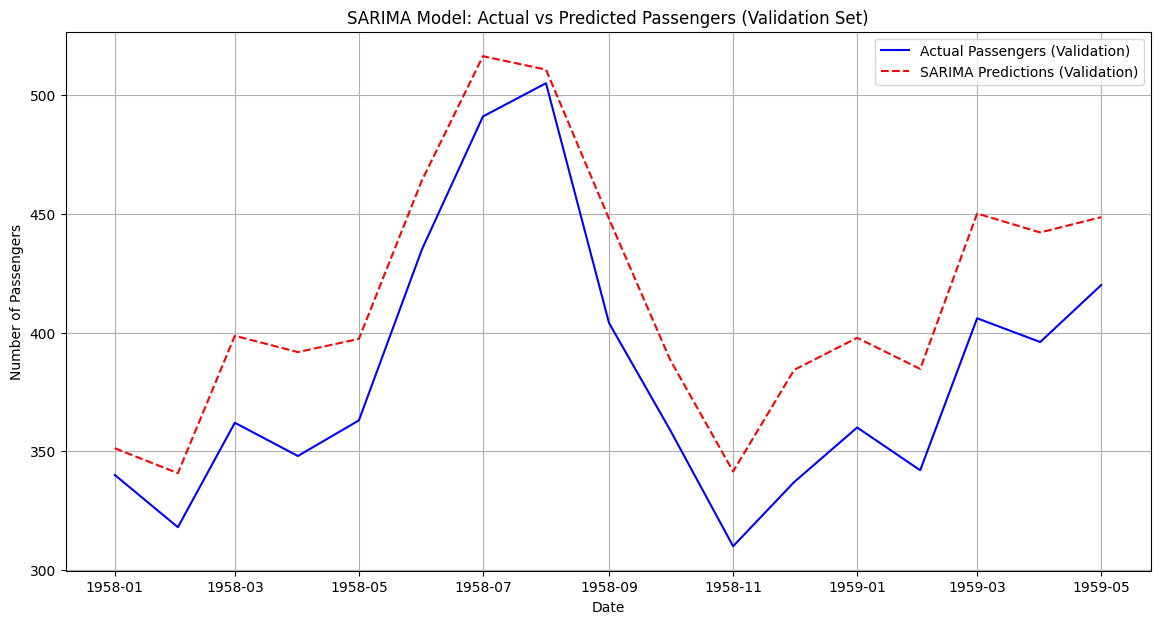

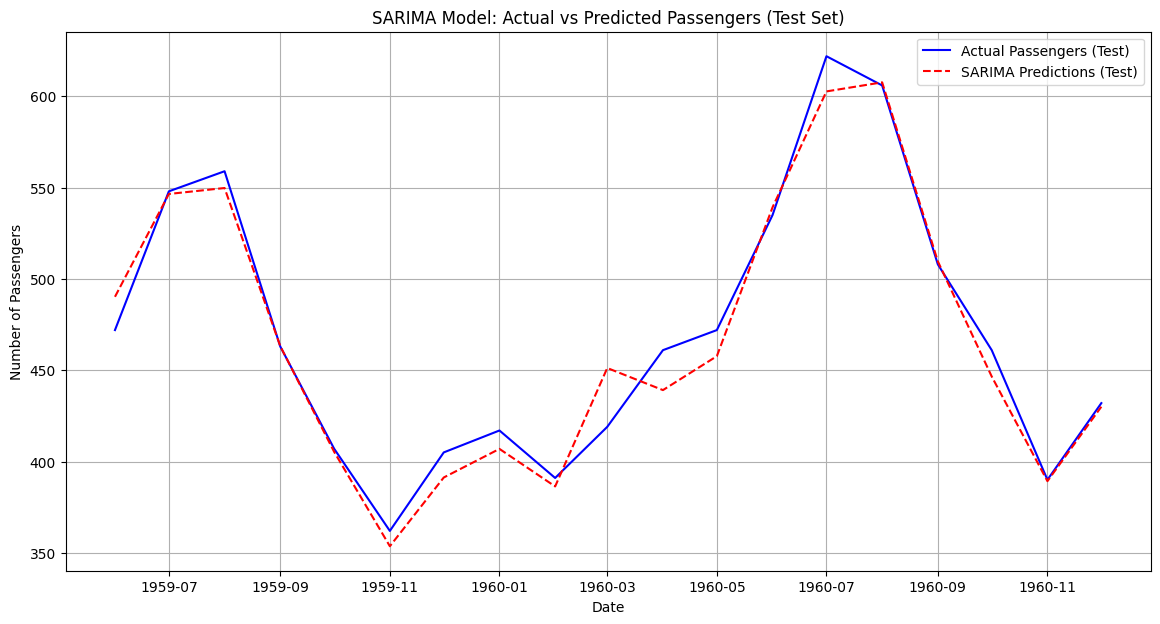

Metrics calculated and visualizations generated.


In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_indices = y_true != 0
    if not np.any(nonzero_indices):
        return np.nan
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100
def calculate_and_print_metrics(y_true, y_pred, set_name, horizon):
    y_true_h = y_true.iloc[:horizon] if len(y_true) >= horizon else y_true
    y_pred_h = y_pred.iloc[:horizon] if len(y_pred) >= horizon else y_pred
    rmse = np.sqrt(mean_squared_error(y_true_h, y_pred_h))
    mae = mean_absolute_error(y_true_h, y_pred_h)
    mape = mean_absolute_percentage_error(y_true_h, y_pred_h)
    print(f"{set_name} (h={horizon})\n" \
          f"  RMSE: {rmse:.4f}\n" \
          f"  MAE: {mae:.4f}\n" \
          f"  MAPE: {mape:.4f}%")
print("5. Calculating performance metrics...")
print("\nValidation Set Metrics:")
calculate_and_print_metrics(actual_val_passengers, sarima_val_preds_original_scale, "Validation Set", 1)
calculate_and_print_metrics(actual_val_passengers, sarima_val_preds_original_scale, "Validation Set", 12)
print("\nTest Set Metrics:")
calculate_and_print_metrics(actual_test_passengers, sarima_test_preds_original_scale, "Test Set", 1)
calculate_and_print_metrics(actual_test_passengers, sarima_test_preds_original_scale, "Test Set", 12)
print("\n6. Visualizing predictions...")
plt.figure(figsize=(14, 7))
plt.plot(actual_val_passengers.index, actual_val_passengers, label='Actual Passengers (Validation)', color='blue')
plt.plot(sarima_val_preds_original_scale.index, sarima_val_preds_original_scale, label='SARIMA Predictions (Validation)', color='red', linestyle='--')
plt.title('SARIMA Model: Actual vs Predicted Passengers (Validation Set)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 7))
plt.plot(actual_test_passengers.index, actual_test_passengers, label='Actual Passengers (Test)', color='blue')
plt.plot(sarima_test_preds_original_scale.index, sarima_test_preds_original_scale, label='SARIMA Predictions (Test)', color='red', linestyle='--')
plt.title('SARIMA Model: Actual vs Predicted Passengers (Test Set)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()
print("Metrics calculated and visualizations generated.")

In [118]:
import tensorflow as tf

In [119]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed, concatenate
from tensorflow.keras.layers import Attention
print("Necessary libraries imported.")

Necessary libraries imported.


In [120]:
n_features = df_features.shape[1] - 1 
n_steps_in = 12 
n_steps_out = 12
n_features = 3
n_features = 3
print(f"Defined hyperparameters:")
print(f"n_features (per timestep): {n_features}")
print(f"n_steps_in (encoder look-back): {n_steps_in}")
print(f"n_steps_out (decoder forecast horizon): {n_steps_out}")

Defined hyperparameters:
n_features (per timestep): 3
n_steps_in (encoder look-back): 12
n_steps_out (decoder forecast horizon): 12


In [121]:
latent_dim = 128 
encoder_inputs = Input(shape=(n_steps_in, n_features), name='encoder_input')
encoder_lstm = LSTM(latent_dim, return_state=True, return_sequences=True, name='encoder_lstm')
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]
print("Encoder part defined.")
print(f"Encoder input shape: {encoder_inputs.shape}")
print(f"Encoder output shape: {encoder_outputs.shape}")
print(f"Encoder hidden state shape: {state_h.shape}")
print(f"Encoder cell state shape: {state_c.shape}")

Encoder part defined.
Encoder input shape: (None, 12, 3)
Encoder output shape: (None, 12, 128)
Encoder hidden state shape: (None, 128)
Encoder cell state shape: (None, 128)


In [122]:
decoder_inputs = RepeatVector(n_steps_out)(state_h)
decoder_lstm = LSTM(latent_dim, return_sequences=True, name='decoder_lstm')
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
print("Decoder part defined.")
print(f"Decoder input (repeated state) shape: {decoder_inputs.shape}")
print(f"Decoder output shape: {decoder_outputs.shape}")

Decoder part defined.
Decoder input (repeated state) shape: (None, 12, 128)
Decoder output shape: (None, 12, 128)


In [123]:
attention_layer = Attention(name='attention_mechanism')
attention_output = attention_layer([decoder_outputs, encoder_outputs])
print("Attention mechanism defined.")
print(f"Attention output shape: {attention_output.shape}")

Attention mechanism defined.
Attention output shape: (None, 12, 128)


In [124]:
decoder_combined_context = concatenate([decoder_outputs, attention_output], name='decoder_combined_context')
decoder_dense = TimeDistributed(Dense(1, activation='linear'), name='output_layer')
decoder_predictions = decoder_dense(decoder_combined_context)
model = Model(inputs=encoder_inputs, outputs=decoder_predictions)
print("Encoder-Decoder model with attention combined.")
print("\nModel Summary:")
model.summary()

Encoder-Decoder model with attention combined.

Model Summary:


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 12, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_lstm (LSTM) │ [(None, 12, 128), │     67,584 │ encoder_input[0]… │
│                     │ (None, 128),      │            │                   │
│                     │ (None, 128)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_2     │ (None, 12, 128)   │          0 │ encoder_lstm[0][… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_lstm (LSTM) │ (None, 12, 128)   │    131,584 │ repeat_vector_2[… │
│                     │                   │            │ encoder_lstm[0][… │
│                     │                   │            │ encoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mechanism │ (None, 12, 128)   │          0 │ decoder_lstm[0][… │
│ (Attention)         │                   │            │ encoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_combined_c… │ (None, 12, 256)   │          0 │ decoder_lstm[0][… │
│ (Concatenate)       │                   │            │ attention_mechan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 12, 1)     │        257 │ decoder_combined… │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 199,425 (779.00 KB)

 Trainable params: 199,425 (779.00 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
data_for_nn = df[['passengers_scaled']].copy()
data_for_nn['year'] = data_for_nn.index.year
data_for_nn['month'] = data_for_nn.index.month
data_for_nn.dropna(inplace=True)
print("Prepared data for Neural Network (data_for_nn):")
print(data_for_nn.head())
print(f"Shape of data_for_nn: {data_for_nn.shape}")

Prepared data for Neural Network (data_for_nn):
            passengers_scaled  year  month
date                                      
1950-02-01           0.639954  1950      2
1950-03-01           0.502384  1950      3
1950-04-01           0.428442  1950      4
1950-05-01           0.455232  1950      5
1950-06-01           0.735621  1950      6
Shape of data_for_nn: (131, 3)


In [126]:
X_enc_all = []
y_dec_all = []
data_for_nn_sorted = data_for_nn.sort_index()
for i in range(n_steps_in, len(data_for_nn_sorted) - n_steps_out + 1):
    encoder_input_sequence = data_for_nn_sorted.iloc[i - n_steps_in:i].values
    decoder_target_sequence = data_for_nn_sorted['passengers_scaled'].iloc[i : i + n_steps_out].values
    X_enc_all.append(encoder_input_sequence)
    y_dec_all.append(decoder_target_sequence)
X_enc_all = np.array(X_enc_all)
y_dec_all = np.array(y_dec_all)
y_dec_all = y_dec_all.reshape(y_dec_all.shape[0], y_dec_all.shape[1], 1)
print(f"Shape of X_enc_all (encoder input sequences): {X_enc_all.shape}")
print(f"Shape of y_dec_all (decoder target sequences): {y_dec_all.shape}")
print("First encoder input sequence:\n", X_enc_all[0])
print("First decoder target sequence:\n", y_dec_all[0])

Shape of X_enc_all (encoder input sequences): (108, 12, 3)
Shape of y_dec_all (decoder target sequences): (108, 12, 1)
First encoder input sequence:
 [[6.39953870e-01 1.95000000e+03 2.00000000e+00]
 [5.02384268e-01 1.95000000e+03 3.00000000e+00]
 [4.28442438e-01 1.95000000e+03 4.00000000e+00]
 [4.55232206e-01 1.95000000e+03 5.00000000e+00]
 [7.35621429e-01 1.95000000e+03 6.00000000e+00]
 [6.42615011e-01 1.95000000e+03 7.00000000e+00]
 [5.01105530e-01 1.95000000e+03 8.00000000e+00]
 [5.41358844e-01 1.95000000e+03 9.00000000e+00]
 [3.63850850e-01 1.95000000e+03 1.00000000e+01]
 [4.32262530e-01 1.95000000e+03 1.10000000e+01]
 [7.81717151e-01 1.95000000e+03 1.20000000e+01]
 [7.16815298e-01 1.95100000e+03 1.00000000e+00]]
First decoder target sequence:
 [[0.29743415]
 [0.70910943]
 [0.34316853]
 [0.96449549]
 [0.        ]
 [0.42902648]
 [0.50110553]
 [0.48279169]
 [0.66031262]
 [0.67894136]
 [0.22789452]
 [0.48190576]]


In [127]:
total_samples_nn = len(X_enc_all)
nn_train_size = int(total_samples_nn * 0.7)
nn_val_size = int(total_samples_nn * 0.15)
nn_test_size = total_samples_nn - nn_train_size - nn_val_size
X_train_enc = X_enc_all[:nn_train_size]
y_train_dec = y_dec_all[:nn_train_size]
X_val_enc = X_enc_all[nn_train_size : nn_train_size + nn_val_size]
y_val_dec = y_dec_all[nn_train_size : nn_train_size + nn_val_size]
X_test_enc = X_enc_all[nn_train_size + nn_val_size :]
y_test_dec = y_dec_all[nn_train_size + nn_val_size :]
print(f"Total samples for NN: {total_samples_nn}")
print(f"NN Training set size: {len(X_train_enc)}")
print(f"NN Validation set size: {len(X_val_enc)}")
print(f"NN Test set size: {len(X_test_enc)}")
print(f"\nShape of X_train_enc: {X_train_enc.shape}")
print(f"Shape of y_train_dec: {y_train_dec.shape}")
print(f"Shape of X_val_enc: {X_val_enc.shape}")
print(f"Shape of y_val_dec: {y_val_dec.shape}")
print(f"Shape of X_test_enc: {X_test_enc.shape}")
print(f"Shape of y_test_dec: {y_test_dec.shape}")

Total samples for NN: 108
NN Training set size: 75
NN Validation set size: 16
NN Test set size: 17

Shape of X_train_enc: (75, 12, 3)
Shape of y_train_dec: (75, 12, 1)
Shape of X_val_enc: (16, 12, 3)
Shape of y_val_dec: (16, 12, 1)
Shape of X_test_enc: (17, 12, 3)
Shape of y_test_dec: (17, 12, 1)


In [128]:
print("2. Compiling the Encoder-Decoder model...")
model.compile(optimizer='adam', loss='mse')
print("Model compiled.")

2. Compiling the Encoder-Decoder model...
Model compiled.


In [129]:
print("3. Training the Encoder-Decoder model...")
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_attention_model.keras', monitor='val_loss', save_best_only=True)
history = model.fit(X_train_enc, y_train_dec,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_val_enc, y_val_dec),
                    callbacks=[early_stopping, model_checkpoint],
                    verbose=1)
print("Model training complete.")

3. Training the Encoder-Decoder model...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 534ms/step - loss: 0.9657 - val_loss: 0.3588
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 0.2764 - val_loss: 0.0430
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0695 - val_loss: 0.0957
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - loss: 0.0882 - val_loss: 0.0295
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0354 - val_loss: 0.0284
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 0.0446 - val_loss: 0.0231
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 0.0317 - val_loss: 0.0132
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0308 - val_loss: 0.0169
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0301 - val_loss: 0.0119
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0276 - val_loss: 0.0134
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0286 - val_loss: 0.0121
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 

In [130]:
print("4. Generating predictions...")
y_val_pred_scaled = model.predict(X_val_enc)
y_test_pred_scaled = model.predict(X_test_enc)
print("Predictions generated.")
print(f"Shape of y_val_pred_scaled: {y_val_pred_scaled.shape}")
print(f"Shape of y_test_pred_scaled: {y_test_pred_scaled.shape}")
print("First validation prediction (scaled):\n", y_val_pred_scaled[0])
print("First test prediction (scaled):\n", y_test_pred_scaled[0])

4. Generating predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions generated.
Shape of y_val_pred_scaled: (16, 12, 1)
Shape of y_test_pred_scaled: (17, 12, 1)
First validation prediction (scaled):
 [[0.49356538]
 [0.48878568]
 [0.51005834]
 [0.4992104 ]
 [0.4923421 ]
 [0.49731705]
 [0.5041802 ]
 [0.5070439 ]
 [0.50531006]
 [0.50204074]
 [0.49878165]
 [0.4950349 ]]
First test prediction (scaled):
 [[0.49356306]
 [0.48878366]
 [0.5100561 ]
 [0.49920774]
 [0.4923394 ]
 [0.49731404]
 [0.5041773 ]
 [0.5070407 ]
 [0.5053067 ]
 [0.5020376 ]
 [0.4987783 ]
 [0.49503148]]


5. Inverse transforming predictions and actuals...
Inverse transformation for predictions and actuals complete.

6. Calculating performance metrics for NN model...

NN Model Validation Set Metrics:
NN Validation Set (h=1) (h=16)
  RMSE: 7.7114
  MAE: 6.4001
  MAPE: 1.6070%
NN Validation Set (h=12) (h=16)
  RMSE: 15.1532
  MAE: 12.5226
  MAPE: 3.0256%

NN Model Test Set Metrics:
NN Test Set (h=1) (h=17)
  RMSE: 15.4132
  MAE: 12.9161
  MAPE: 3.1407%
NN Test Set (h=12) (h=17)
  RMSE: 20.7296
  MAE: 15.2913
  MAPE: 3.3969%

7. Visualizing predictions for NN model vs SARIMA and Actuals...


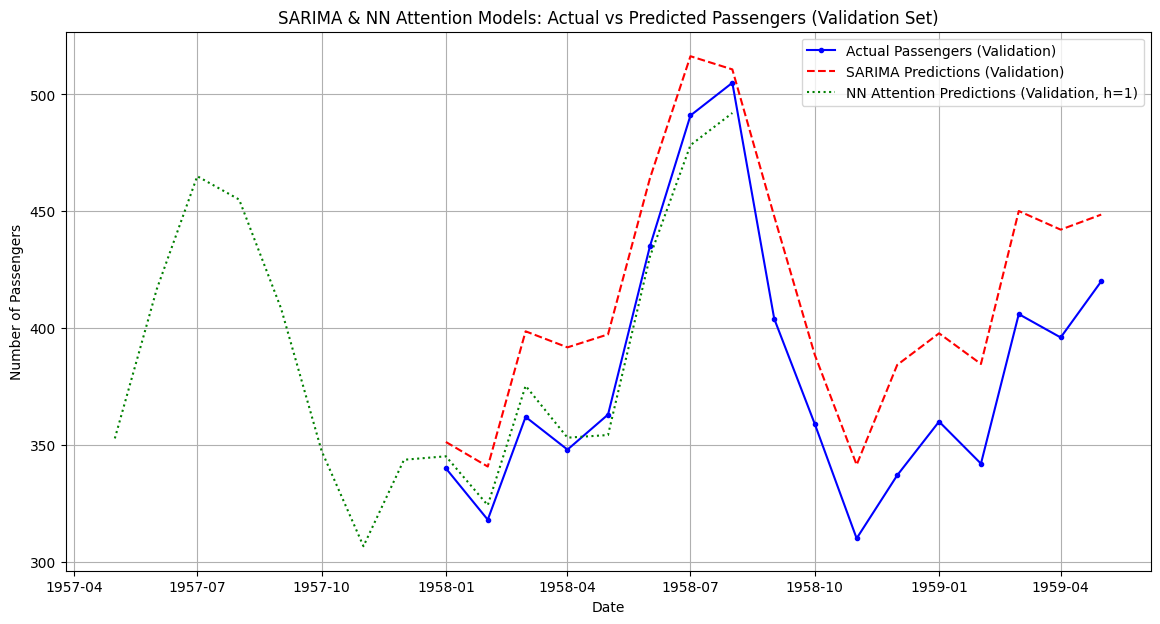

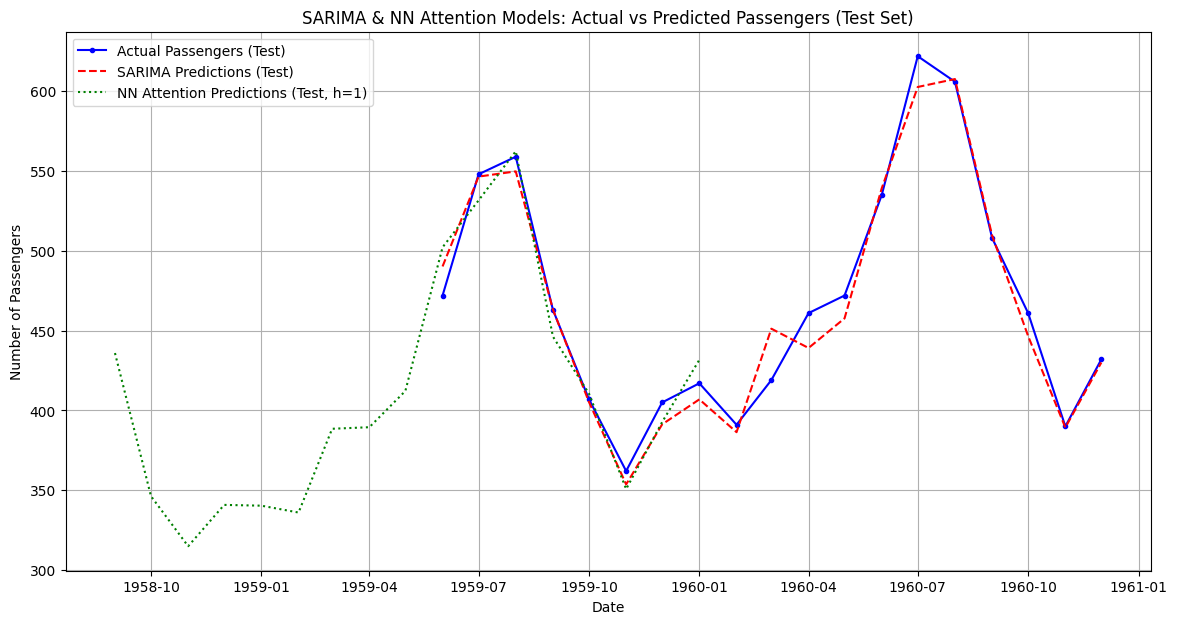

NN Model metrics calculated and visualizations generated.


In [134]:
print("5. Inverse transforming predictions and actuals...")
def inverse_transform_single_value(scaled_value, sample_idx_in_subset, horizon_step, subset_type, df_original, df_features_index, nn_train_size, nn_val_size, scaler):
    if subset_type == 'val':
        base_idx_in_df_features = nn_train_size + sample_idx_in_subset
    elif subset_type == 'test':
        base_idx_in_df_features = nn_train_size + nn_val_size + sample_idx_in_subset
    else:
        raise ValueError("subset_type must be 'val' or 'test'")
    forecast_date = df_features_index[base_idx_in_df_features + horizon_step - 1]
    passengers_diff_seasonal_value = scaler.inverse_transform([[scaled_value]])[0][0]
    prev_diff_date = forecast_date - pd.DateOffset(months=12)
    prev_passengers_diff = df_original['passengers_diff'].loc[prev_diff_date]
    passengers_diff_value = passengers_diff_seasonal_value + prev_passengers_diff
    prev_log_date = forecast_date - pd.DateOffset(months=1)
    prev_passengers_log = df_original['passengers_log'].loc[prev_log_date]
    passengers_log_value = passengers_diff_value + prev_passengers_log
    passengers_original_value = np.exp(passengers_log_value)
    return passengers_original_value
nn_val_preds_h1_original = []
nn_val_actuals_h1_original = []
nn_val_preds_h12_original = []
nn_val_actuals_h12_original = []
for k in range(len(X_val_enc)):
    scaled_pred_h1 = y_val_pred_scaled[k, 0, 0]
    nn_val_preds_h1_original.append(inverse_transform_single_value(scaled_pred_h1, k, 1, 'val', df, df_features.index, nn_train_size, nn_val_size, scaler))
    scaled_actual_h1 = y_val_dec[k, 0, 0]
    nn_val_actuals_h1_original.append(inverse_transform_single_value(scaled_actual_h1, k, 1, 'val', df, df_features.index, nn_train_size, nn_val_size, scaler))
    if n_steps_out >= 12:
        scaled_pred_h12 = y_val_pred_scaled[k, 11, 0]
        nn_val_preds_h12_original.append(inverse_transform_single_value(scaled_pred_h12, k, 12, 'val', df, df_features.index, nn_train_size, nn_val_size, scaler))
        scaled_actual_h12 = y_val_dec[k, 11, 0]
        nn_val_actuals_h12_original.append(inverse_transform_single_value(scaled_actual_h12, k, 12, 'val', df, df_features.index, nn_train_size, nn_val_size, scaler))
nn_test_preds_h1_original = []
nn_test_actuals_h1_original = []
nn_test_preds_h12_original = []
nn_test_actuals_h12_original = []
for k in range(len(X_test_enc)):
    scaled_pred_h1 = y_test_pred_scaled[k, 0, 0]
    nn_test_preds_h1_original.append(inverse_transform_single_value(scaled_pred_h1, k, 1, 'test', df, df_features.index, nn_train_size, nn_val_size, scaler))
    scaled_actual_h1 = y_test_dec[k, 0, 0]
    nn_test_actuals_h1_original.append(inverse_transform_single_value(scaled_actual_h1, k, 1, 'test', df, df_features.index, nn_train_size, nn_val_size, scaler))
    if n_steps_out >= 12:
        scaled_pred_h12 = y_test_pred_scaled[k, 11, 0]
        nn_test_preds_h12_original.append(inverse_transform_single_value(scaled_pred_h12, k, 12, 'test', df, df_features.index, nn_train_size, nn_val_size, scaler))
        scaled_actual_h12 = y_test_dec[k, 11, 0]
        nn_test_actuals_h12_original.append(inverse_transform_single_value(scaled_actual_h12, k, 12, 'test', df, df_features.index, nn_train_size, nn_val_size, scaler))
nn_val_preds_h1_original = np.array(nn_val_preds_h1_original)
nn_val_actuals_h1_original = np.array(nn_val_actuals_h1_original)
nn_val_preds_h12_original = np.array(nn_val_preds_h12_original)
nn_val_actuals_h12_original = np.array(nn_val_actuals_h12_original)
nn_test_preds_h1_original = np.array(nn_test_preds_h1_original)
nn_test_actuals_h1_original = np.array(nn_test_actuals_h1_original)
nn_test_preds_h12_original = np.array(nn_test_preds_h12_original)
nn_test_actuals_h12_original = np.array(nn_test_actuals_h12_original)
print("Inverse transformation for predictions and actuals complete.")
print("\n6. Calculating performance metrics for NN model...")
print("\nNN Model Validation Set Metrics:")
calculate_and_print_metrics(pd.Series(nn_val_actuals_h1_original), pd.Series(nn_val_preds_h1_original), "NN Validation Set (h=1)", len(nn_val_actuals_h1_original))
calculate_and_print_metrics(pd.Series(nn_val_actuals_h12_original), pd.Series(nn_val_preds_h12_original), "NN Validation Set (h=12)", len(nn_val_actuals_h12_original))
print("\nNN Model Test Set Metrics:")
calculate_and_print_metrics(pd.Series(nn_test_actuals_h1_original), pd.Series(nn_test_preds_h1_original), "NN Test Set (h=1)", len(nn_test_actuals_h1_original))
calculate_and_print_metrics(pd.Series(nn_test_actuals_h12_original), pd.Series(nn_test_preds_h12_original), "NN Test Set (h=12)", len(nn_test_actuals_h12_original))
print("\n7. Visualizing predictions for NN model vs SARIMA and Actuals...")
val_dates_for_nn_h1_preds = df_features.index[nn_train_size : nn_train_size + nn_val_size]
test_dates_for_nn_h1_preds = df_features.index[nn_train_size + nn_val_size : nn_train_size + nn_val_size + nn_test_size]
nn_val_preds_h1_series = pd.Series(nn_val_preds_h1_original, index=val_dates_for_nn_h1_preds)
nn_test_preds_h1_series = pd.Series(nn_test_preds_h1_original, index=test_dates_for_nn_h1_preds)
plt.figure(figsize=(14, 7))
plt.plot(actual_val_passengers.index, actual_val_passengers, label='Actual Passengers (Validation)', color='blue', marker='.')
plt.plot(sarima_val_preds_original_scale.index, sarima_val_preds_original_scale, label='SARIMA Predictions (Validation)', color='red', linestyle='--')
plt.plot(nn_val_preds_h1_series.index, nn_val_preds_h1_series, label='NN Attention Predictions (Validation, h=1)', color='green', linestyle=':')
plt.title('SARIMA & NN Attention Models: Actual vs Predicted Passengers (Validation Set)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 7))
plt.plot(actual_test_passengers.index, actual_test_passengers, label='Actual Passengers (Test)', color='blue', marker='.')
plt.plot(sarima_test_preds_original_scale.index, sarima_test_preds_original_scale, label='SARIMA Predictions (Test)', color='red', linestyle='--')
plt.plot(nn_test_preds_h1_series.index, nn_test_preds_h1_series, label='NN Attention Predictions (Test, h=1)', color='green', linestyle=':')
plt.title('SARIMA & NN Attention Models: Actual vs Predicted Passengers (Test Set)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()
print("NN Model metrics calculated and visualizations generated.")

In [132]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dot, Activation
query_tensor = decoder_outputs
key_tensor = encoder_outputs
attention_scores_tensor = Dot(axes=(2, 2))([query_tensor, key_tensor])
attention_weights = Activation('softmax', name='attention_weights')(attention_scores_tensor)
attention_model = Model(inputs=encoder_inputs, outputs=attention_weights)
print("Attention weight extraction model defined.")
print(f"Attention weights output shape: {attention_weights.shape}")
print("\nAttention Model Summary:")
attention_model.summary()

Attention weight extraction model defined.
Attention weights output shape: (None, 12, 12)

Attention Model Summary:


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 12, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_lstm (LSTM) │ [(None, 12, 128), │     67,584 │ encoder_input[0]… │
│                     │ (None, 128),      │            │                   │
│                     │ (None, 128)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_2     │ (None, 12, 128)   │          0 │ encoder_lstm[0][… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_lstm (LSTM) │ (None, 12, 128)   │    131,584 │ repeat_vector_2[… │
│                     │                   │            │ encoder_lstm[0][… │
│                     │                   │            │ encoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_2 (Dot)         │ (None, 12, 12)    │          0 │ decoder_lstm[0][… │
│                     │                   │            │ encoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_weights   │ (None, 12, 12)    │          0 │ dot_2[0][0]       │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 199,168 (778.00 KB)

 Trainable params: 199,168 (778.00 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted attention weights shape for selected samples: (3, 12, 12)


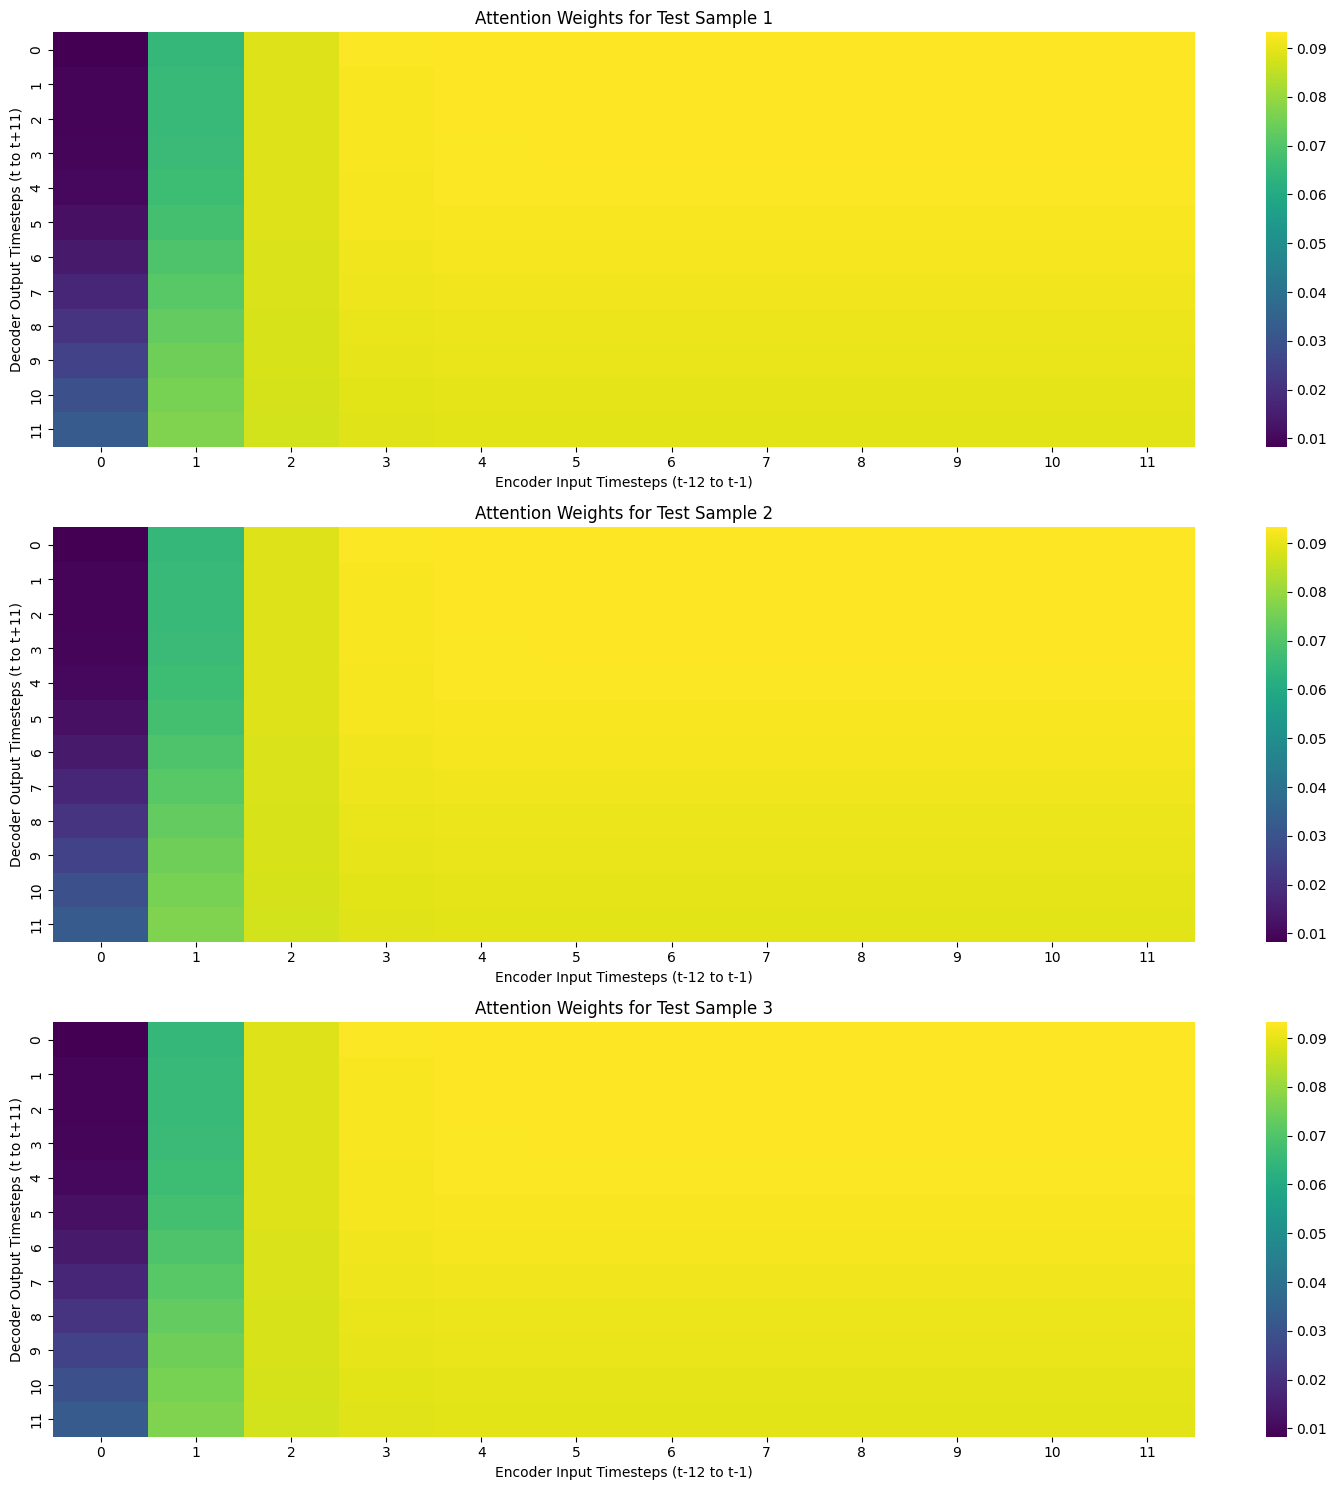

Attention weights visualized for selected test samples.


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sample_indices = [0, 1, 2]
selected_X_test_enc = X_test_enc[sample_indices]
predicted_attention_weights = attention_model.predict(selected_X_test_enc)
print(f"Predicted attention weights shape for selected samples: {predicted_attention_weights.shape}")
plt.figure(figsize=(15, 5 * len(sample_indices)))
for i, sample_idx in enumerate(sample_indices):
    plt.subplot(len(sample_indices), 1, i + 1)
    sns.heatmap(predicted_attention_weights[i], cmap='viridis', cbar=True)
    plt.title(f'Attention Weights for Test Sample {sample_idx + 1}')
    plt.xlabel('Encoder Input Timesteps (t-12 to t-1)') 
    plt.ylabel('Decoder Output Timesteps (t to t+11)')
plt.tight_layout()
plt.show()
print("Attention weights visualized for selected test samples.")